In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
gold = pd.read_csv('gld_price_data.csv')

In [3]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# getting some basic informations about the data

In [4]:
gold.shape

(2290, 6)

In [5]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# checking the number of missing values
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# getting the statistical measures of the data
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:

Positive Correlation                                    
Negative Correlation

In [8]:
correlation = gold.corr()

C:\Users\nk\AppData\Local\Temp\ipykernel_11564\2859792259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold.corr()


<Axes: >

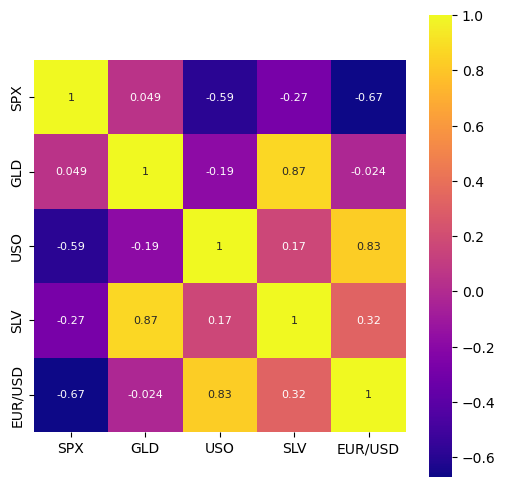

In [9]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={"size":8},cmap="plasma")

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [11]:
# checking the distribution of the GLD Price

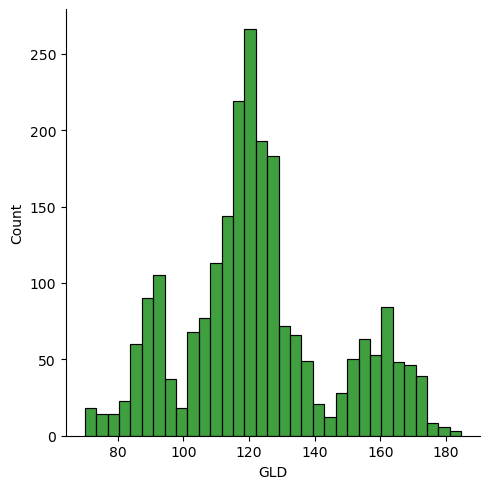

In [12]:
sns.displot(gold['GLD'],color='green')

# Splitting the Features and Target

In [13]:
X = gold.drop(['Date','GLD'],axis=1)
y = gold['GLD']

In [14]:
y.shape

(2290,)

# training the model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
r2_score(y_test,pred)

0.9904249776549925

In [20]:
print(pred)

[122.37769973 130.11870266 127.62050011  96.75449759 118.87490041
 114.50759936 124.99900152 117.72659951 108.02420127  98.30299936
  95.53429994 167.65639821 149.86550139 116.41210078 170.85090187
  85.11049997 123.10399885 109.40349729 113.19360064 131.52940362
 124.31139889 113.82920089 115.89540085 108.83019971 108.6129015
 125.86779934 119.16119999 112.7070993  113.47250153 125.54439878
 146.31340125  89.55040012 167.72360018 113.50329951 108.43930064
 120.16770128 142.15859897 161.42110237 174.22879849 152.93220158
 119.63830103 113.36300043 121.34429945 113.72889939 121.98580022
 107.93040073  88.7001989  114.61299917 129.84970203 117.93990103
 104.16929969 129.82600201 107.27719847 160.53400399 131.81600031
 118.06309972 146.95710087 135.41810248  95.67140129 124.69240128
 115.46239888  85.8385007  104.20339934 113.97090081  84.16309934
 122.30190019 116.55299939 113.57660224 165.9757037   92.1795003
  80.35910079 160.97930014 158.8750021  106.83329974 150.05550158
 109.6712974